Hello Everyone!!!
In this notebook i will explain working of linear regression from scratch and it's implmentation without using any ml library.

**Introduction**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

**Simple regression**
Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

y=mx+b

**Multivariable regression**

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

                        f(x,y,z)=w1x+w2y+w3z
The variables x,y,z represent the attributes, or distinct pieces of information, we have about each observation.For sales predictions, these attributes might include a company’s advertising spend on radio, TV, and newspapers.
                           
                        Sales=w1Radio+w2TV+w3News 

**Simple Regression**

Let’s say we are given a dataset with the following columns (features): how much a company spends on Radio advertising each year and its annual Sales in terms of units sold. We are trying to develop an equation that will let us to predict units sold based on how much a company spends on radio advertising. The rows (observations) represent companies.

In [8]:
import pandas as pd
data = pd.read_csv("../input/advertising.csv")
data.head()



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Making Prediction**
Our prediction function outputs an estimate of sales given a company’s radio advertising spend and our current values for Weight and Bias.

                            Sales=Weight⋅Radio+Bias

**Weight**

the coefficient for the Radio independent variable. In machine learning we call coefficients weights.

**Radio**

the independent variable. In machine learning we call these variables features.

**Bias**

the intercept where our line intercepts the y-axis. In machine learning we can call intercepts bias. Bias offsets all predictions that we make.

Our algorithm will try to learn the correct values for Weight and Bias. By the end of our training, our equation will approximate the line of best fit.

![pic1.jpg](https://ml-cheatsheet.readthedocs.io/en/latest/_images/linear_regression_line_intro.png)



In [9]:
def predict_sales(radio, weight, bias):
    return weight*radio + bias

**The Cost Function**
The prediction function is nice, but for our purposes we don’t really need it. What we need is a cost function so we can start optimizing our weights.

Let’s use MSE (L2) as our cost function. MSE measures the average squared difference between an observation’s actual and predicted values. The output is a single number representing the cost, or score, associated with our current set of weights. Our goal is to minimize MSE to improve the accuracy of our model.

**Math**


Given our simple linear equation y=mx+b, we can calculate MSE as:

                    MSE=1N∑i=1n(yi−(mxi+b))2

In [10]:
def cost_function(radio, sales, weight, bias):
    companies = len(radio)
    total_error = 0.0
    for i in range(companies):
        total_error += (sales[i] - (weight*radio[i] + bias))**2
    return total_error / companies

**Gradient descent**

To minimize MSE we use Gradient Descent to calculate the gradient of our cost function. 

**Math**

There are two parameters (coefficients) in our cost function we can control: weight m and bias b. Since we need to consider the impact each one has on the final prediction, we use partial derivatives. To find the partial derivatives, we use the Chain rule. We need the chain rule because (y−(mx+b))2 is really 2 nested functions: the inner function y−(mx+b) and the outer function x2.

**Returning to our cost function:**

                        f(m,b)=1N∑i=1n(yi−(mxi+b))2

We can calculate the gradient of this cost function as:

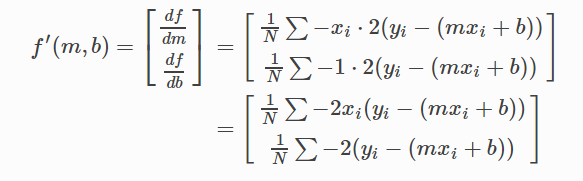
  
**Code**

To solve for the gradient, we iterate through our data points using our new weight and bias values and take the average of the partial derivatives. The resulting gradient tells us the slope of our cost function at our current position (i.e. weight and bias) and the direction we should update to reduce our cost function (we move in the direction opposite the gradient). The size of our update is controlled by the learning rate.

In [11]:
def update_weights(radio, sales, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(radio)

    for i in range(companies):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*radio[i] * (sales[i] - (weight*radio[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(sales[i] - (weight*radio[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / companies) * learning_rate
    bias -= (bias_deriv / companies) * learning_rate

    return weight, bias

**Training**

Training a model is the process of iteratively improving your prediction equation by looping through the dataset multiple times, each time updating the weight and bias values in the direction indicated by the slope of the cost function (gradient). Training is complete when we reach an acceptable error threshold, or when subsequent training iterations fail to reduce our cost.

Before training we need to initialize our weights (set default values), set our hyperparameters (learning rate and number of iterations), and prepare to log our progress over each iteration.



In [13]:
def train(radio, sales, weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weight,bias = update_weights(radio, sales, weight, bias, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))

    return weight, bias, cost_history

In [16]:
radio = data['Radio'].values
sales = data['Sales'].values
weight = 0
bias = 0
lr = 0.01
iters = 100
train(radio,sales,weight,bias,lr,iters)

iter=0    weight=7.59    bias=0.3026    cost=3.8e+04
iter=10    weight=2405173039799.18    bias=73599287290.5942    cost=4.4e+27
iter=20    weight=815974020723917184827392.00    bias=24969141670289308909568.0000    cost=5.1e+50
iter=30    weight=276825655152063131060260668006465536.00    bias=8470979254131427124399864041963520.0000    cost=5.8e+73
iter=40    weight=93915298041452327294731439888541830077428531200.00    bias=2873846865521575588505351860423181092761108480.0000    cost=6.7e+96
iter=50    weight=31861509372640639389418406280951599831087152017021203382272.00    bias=974975331504933409782714414364953867539709003923550371840.0000    cost=7.7e+119
iter=60    weight=10809269636292856088171973252592657331885255059040396045391077683757056.00    bias=330768110314963329617902546569290030461484127346338398066860529549312.0000    cost=8.9e+142
iter=70    weight=3667130414430807992123323032464152800471756619739632767020847353568919970574761984.00    bias=1122157035834481873806553989304

(-1.006614932547681e+115,
 -3.08028322224193e+113,
 [38364.16330524686,
  7749556.174937002,
  1568119390.2759905,
  317310985414.3346,
  64208290697878.26,
  1.2992631155844442e+16,
  2.629075817425043e+18,
  5.3199691200807895e+20,
  1.0765026725753641e+23,
  2.1783171629468084e+25,
  4.4078531185034627e+27,
  8.919348130194725e+29,
  1.804841697960622e+32,
  3.652120656295389e+34,
  7.390113661054424e+36,
  1.4953991136399633e+39,
  3.0259595611633992e+41,
  6.123068538878864e+43,
  1.2390108847784284e+46,
  2.5071546445248688e+48,
  5.0732600405578486e+50,
  1.0265807693724723e+53,
  2.0772995423461308e+55,
  4.203442649007765e+57,
  8.505720885848681e+59,
  1.7211436869500366e+62,
  3.482756642128388e+64,
  7.047403375010331e+66,
  1.4260512414027028e+69,
  2.8856332394954074e+71,
  5.839116401378538e+73,
  1.1815528003416633e+76,
  2.3908874631539007e+78,
  4.837991886451058e+80,
  9.789739523118512e+82,
  1.9809665286729534e+85,
  4.00851154257525e+87,
  8.111275255984789e+89,
 

**Model Evaluation** 

![pic2](https://ml-cheatsheet.readthedocs.io/en/latest/_images/linear_regression_line_1.png)

![pic3](https://ml-cheatsheet.readthedocs.io/en/latest/_images/linear_regression_line_2.png)

![pic4](https://ml-cheatsheet.readthedocs.io/en/latest/_images/linear_regression_line_3.png)

![pic5](https://ml-cheatsheet.readthedocs.io/en/latest/_images/linear_regression_line_4.png)

**Cost History**

![pic6](https://ml-cheatsheet.readthedocs.io/en/latest/_images/linear_regression_training_cost.png)
